<a href="https://colab.research.google.com/github/wliberatoc/PI/blob/main/19_10_Tarefa_5_(Quarta_Semana_(ERE)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

#1. Limiarização de Imagens

Nos vídeos abaixo, eu discuto o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#não funciona no coolab
import numpy as np
import cv2

ESCAPE_KEY_ASCII = 27

def onChange(value):
    pass

img = cv2.imread("sonic.jpg", 0)
tituloW = "Limearizacao"
cv2.namedWindow(tituloW)
cv2.createTrackbar("limiar", tituloW, 120, 255, onChange)
limiarUpdate = False
limiar_Oring = cv2.getTrackbarPos("limiar", tituloW)
copia_Img = img.copy()

while(True):
    limiar_Update = cv2.getTrackbarPos("limiar", tituloW)
    if(limiar_Oring != limiar_Update):
        limiar_Oring = limiar_Update
        limiarUpdate = True
    if(limiarUpdate):
        _, copia_Img =  cv2.threshold(img, limiar_Update, 255, cv2.THRESH_BINARY)
        limiarUpdate = False
    
    cv2.imshow(tituloW, copia_Img)
    
    keyPressed = cv2.waitKey(1) & 0xFF
    if (keyPressed == ESCAPE_KEY_ASCII or cv2.getWindowProperty("Limearizacao Adaptativa", 0)== 1):
        break
    
cv2.destroyAllWindows()


#2. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>

Explique com suas palavras no áudio qual foi o efeito e quando cada filtro deve ser aplicado.

Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

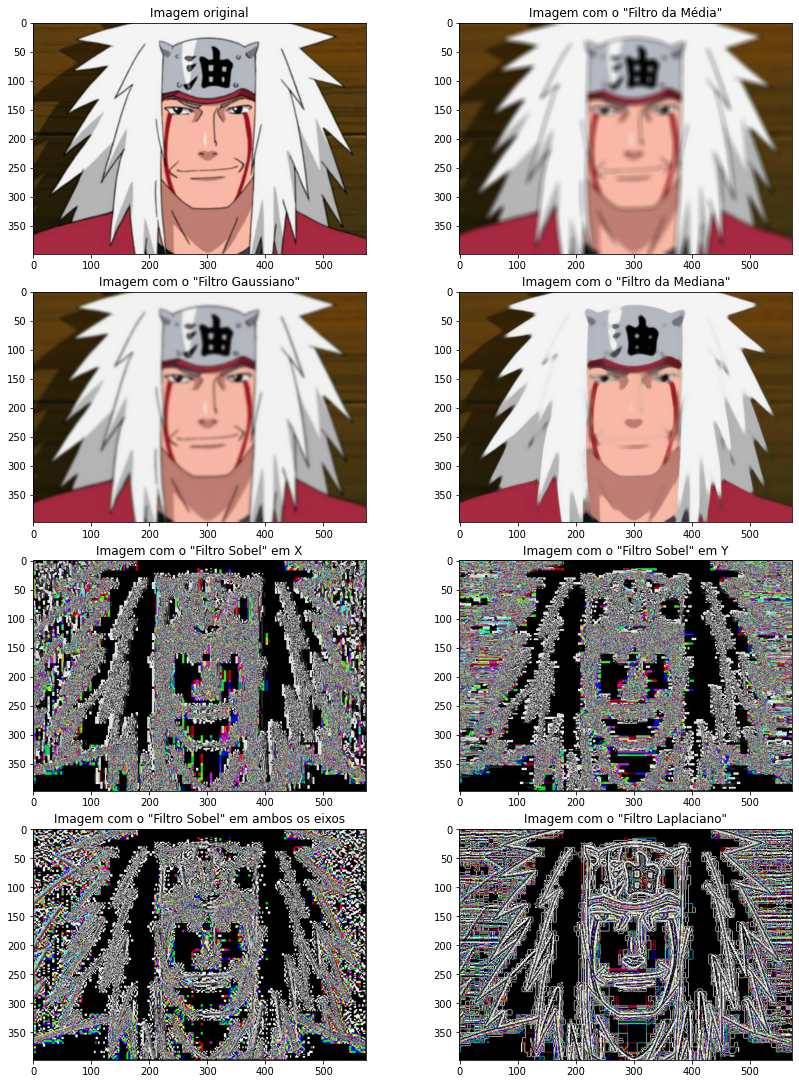

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def filtragem(img, filtro):#função que aplica o filtro passado por parametro 
  if filtro == 'Filtro da Média':
    return cv2.blur(img,(11,11))
  elif filtro == 'Filtro Gaussiano' :
    return cv2.GaussianBlur(img,(11,11),0)
  elif filtro == 'Filtro da Mediana':
    return cv2.medianBlur(img,11)
  elif filtro == 'Filtro Sobel':
    cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.Sobel(cinza,cv2.CV_64F,1,0,ksize=5), cv2.Sobel(cinza,cv2.CV_64F,0,1,ksize=5), cv2.Sobel(cinza,cv2.CV_64F,1,1,ksize=5)
  elif filtro == 'Filtro Laplaciano':
    cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.Laplacian(cinza,cv2.CV_64F)

def criaGrid(imagens, filtro):#Função que cria e mostra 0 grid 
  figura_largura = 12
  figura_altura = 15
  y = int(4)
  x = 2
  fig, axis = plt.subplots(y, x,figsize=(figura_largura,figura_altura))
  possicao_X, possicao_Y, filtro_Id = 0, 0, 0
  for img in imagens:
    axis[possicao_Y, possicao_X].set_title(filtro[filtro_Id])
    axis[possicao_Y, possicao_X].imshow(img.astype(np.uint8))
    if len(filtro[filtro_Id]) == 0:
      axis[possicao_Y, possicao_X].axis('off')
    filtro_Id += 1
    possicao_X += 1
    if possicao_X == x:
      possicao_X = 0
      possicao_Y += 1
  fig.tight_layout(pad=0.5)
  plt.show()

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/jiraya.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

filtro_Media = filtragem(img, 'Filtro da Média')
filtro_Gaussiano = filtragem(img, 'Filtro Gaussiano')
filtro_Sobel_X, filtro_Sobel_Y, filtro_Sobel = filtragem(img, 'Filtro Sobel')
filtro_Laplaciano = filtragem(img, 'Filtro Laplaciano')
filtro_Mediana = filtragem(img, 'Filtro da Mediana')

img_Titulo = 'Imagem original'
filtro_Media_Titulo = 'Imagem com o "Filtro da Média"'
filtro_Gaussiano_Titulo = 'Imagem com o "Filtro Gaussiano"'
filtro_Mediana_Titulo = 'Imagem com o "Filtro da Mediana"'
sbxt = 'Imagem com o "Filtro Sobel" em X'
sbyt = 'Imagem com o "Filtro Sobel" em Y'
sbt = 'Imagem com o "Filtro Sobel" em ambos os eixos'
filtro_Laplaciano_Titulo = 'Imagem com o "Filtro Laplaciano"'

lista_Imagens = [img,filtro_Media,filtro_Gaussiano,filtro_Mediana,filtro_Sobel_X,filtro_Sobel_Y,filtro_Sobel,filtro_Laplaciano]
lista_Filtros = [img_Titulo,filtro_Media_Titulo,filtro_Gaussiano_Titulo,filtro_Mediana_Titulo,sbxt,sbyt,sbt,filtro_Laplaciano_Titulo]
criaGrid(lista_Imagens,lista_Filtros)

#3. Recapitulação

Acesse o SIGAA e no fórum "Recapitulação do Primeiro Mês", responda as seguintes perguntas com suas palavras:

* O que é o Processamento de Imagens?
* O que são modelos de cor (exemplo: RGB, HSV) e para que servem?
* Liste conhecimentos que você aprendeu até aqui e exemplo de uso dos mesmos.
